# Single file

In [ ]:
import librosa
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
print(x.shape)
print(sr)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=x, rate=sr)

In [ ]:
single_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(single_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
single_mfcc

# Whole Dataset (1440 files)

In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split



Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

This means the meta data for the audio file is:

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [7]:
audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"

actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [8]:
audio

'/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/'

In [9]:
# audio/audio/audio_speech_actors_01-24/Actor_14
# 03-01-02-01-02-01-14.wav

emotion = []
gender = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [10]:
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df],axis=1)
audio_df.columns = ['gender','emotion']
audio_df['labels'] =audio_df.gender + '_' + audio_df.emotion
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df = audio_df.drop(['gender', 'emotion'], axis=1)
audio_df.labels.value_counts()

female_disgust     96
female_fear        96
female_angry       96
male_surprise      96
female_happy       96
male_angry         96
male_calm          96
male_sad           96
female_surprise    96
female_calm        96
male_happy         96
male_disgust       96
female_sad         96
male_fear          96
male_neutral       48
female_neutral     48
Name: labels, dtype: int64

In [6]:
audio_df.to_csv('audio.csv')

In [ ]:

os.listdir(audio)

In [ ]:
fname = audio + 'Actor_02/03-01-01-01-01-01-02.wav'  #female neutral
data_neutral, sr_neutral = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data_neutral, sr=sr_neutral)
ipd.Audio(fname)

In [ ]:
fname = audio + 'Actor_02/03-01-02-01-01-01-02.wav'  #female calm
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data, sr=sampling_rate)
ipd.Audio(fname)


# MFCC
### The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. MFCC is a good "representation" of the vocal tract that produces the sound. Think of it like an x-ray of your mouth

In [ ]:
fa_mfcc = librosa.feature.mfcc(y=data_neutral, sr=sr_neutral, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(fa_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
# MFCC
#The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features 
#(usually about 10–20) which concisely describe the overall shape of a spectral envelope.
# good "representation" of the vocal tract that produces the sound. Think of it like an 
# x-ray of your mouth
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar();

In [ ]:
mfcc.shape

In [ ]:
# Male surprised
pathh = audio + 'Actor_09/03-01-08-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Female surprised
path= audio + 'Actor_08/03-01-08-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='Female Surprised')
plt.plot(male, label='Male Surprised')
plt.legend()



In [ ]:
# Spectrogram - how the audio spectrum varies as a function of time
spectrogram = librosa.feature.melspectrogram(y=X, sr=sampling_rate)
db_spec = librosa.power_to_db(spectrogram, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar();

## Feature Extraction

In [11]:
df = pd.DataFrame(columns=['mfcc_feature'])

# feature extraction over the entire dataset
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   


print(len(df))
df.head()


1440


,mfcc_feature
0,"[-61.862374191339036, -61.862374191339036, -61..."
1,"[-61.50800105381538, -61.50800105381538, -61.5..."
2,"[-55.66308593160217, -56.17033629546251, -56.1..."
3,"[-63.52352959684379, -63.52352959684379, -63.5..."
4,"[-43.19739053316282, -44.238600301837614, -43...."


In [ ]:
df_chroma = pd.DataFrame(columns=['chroma_feat'])

# feature extraction over the entire dataset
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    chroma=np.mean(librosa.feature.chroma_stft(X, sr=sample_rate).T,axis=0)
    df_chroma.loc[counter] = [chroma]
    counter=counter+1   


print(len(df_chroma))
df_chroma.head()

In [ ]:
# Extract the mean bands to its own feature columns
df_combined = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist()),pd.DataFrame(df_chroma['chroma_feat'].values.tolist())],axis=1)
df_combined.head()

In [47]:
from sklearn.model_selection import train_test_split
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=22
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
890,-57.251298,-55.135873,-52.830597,-50.497044,-48.499549,-49.208680,-51.896619,-56.573747,-56.517040,-53.849786,...,-48.636221,-50.341801,-49.158410,-50.554314,-51.177394,-53.145746,-53.417671,-53.997535,-55.854871,-54.195359
406,-61.578101,-61.673224,-62.831103,-63.832680,-64.865752,-65.234107,-66.294061,-67.069256,-67.069256,-66.795328,...,-30.498486,-31.185408,-32.782602,-34.491223,-35.530448,-36.639739,-39.010949,-41.100021,-42.169942,-42.573329
660,-66.818947,-66.818947,-65.582900,-63.439996,-66.818403,-66.761740,-65.490220,-66.593945,-66.818947,-66.013497,...,-47.181827,-48.255407,-49.223744,-49.822458,-54.132518,-55.426454,-54.248539,-51.436671,-51.311315,-56.425171
613,-57.242510,-55.023165,-54.382124,-55.727116,-54.904653,-55.443820,-54.799368,-54.979560,-55.338286,-55.462773,...,-53.766093,-53.414806,-54.487051,-56.974286,-60.323581,-59.273292,-59.083786,-57.853121,-58.491580,-56.709638
164,-59.131263,-58.285060,-58.198699,-57.998669,-55.862233,-52.840274,-48.240766,-43.556855,-42.859939,-45.325574,...,-47.393752,-46.345942,-44.766523,-47.263935,-49.544890,-46.250867,-44.573158,-45.727811,-47.121359,-47.726481
1132,-44.367470,-44.555682,-45.389494,-46.178208,-45.476410,-44.931989,-44.843055,-45.842348,-45.726843,-46.178208,...,-36.563055,-36.880264,-37.774918,-36.026037,-35.386804,-35.742715,-36.695832,-36.756048,-24.732812,-17.532417
1294,-50.574255,-50.574255,-50.574255,-50.574255,-50.574255,-50.564788,-50.258158,-50.093196,-49.853892,-50.041811,...,-46.319233,-47.543641,-47.412853,-48.369692,-48.914861,-47.969699,-48.429858,-49.166957,-49.127701,-50.121137
978,-53.141989,-52.674986,-50.214223,-50.819006,-54.603820,-52.255261,-50.683798,-52.724802,-49.598236,-51.657570,...,-46.110015,-47.976356,-47.613287,-48.414052,-49.194751,-50.277707,-52.465255,-54.078607,-56.517974,-57.023303
1287,-47.414285,-48.179826,-51.837040,-51.647989,-54.661437,-58.216289,-58.381826,-57.828549,-57.804660,-57.082074,...,-49.676815,-49.914323,-51.756486,-52.832853,-56.316714,-56.228034,-56.760224,-56.698584,-55.908250,-55.275066
485,-42.326535,-42.384104,-41.830340,-41.722433,-41.489256,-41.244489,-41.359679,-41.101078,-41.173716,-41.788700,...,-29.022729,-19.884967,-14.869343,-16.391935,-19.206144,-19.625772,-16.581887,-13.264476,-8.564638,-2.037606


In [45]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [46]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils, to_categorical

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


In [15]:
print(lb.classes_)

['female_angry' 'female_calm' 'female_disgust' 'female_fear'
 'female_happy' 'female_neutral' 'female_sad' 'female_surprise'
 'male_angry' 'male_calm' 'male_disgust' 'male_fear' 'male_happy'
 'male_neutral' 'male_sad' 'male_surprise']


In [14]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1080, 216, 1)

In [15]:
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM


# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(1)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(1)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 256)          0         
___________________________________________________________

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train,batch_size=16, epochs=50, validation_data=(X_test, y_test))

Train on 1080 samples, validate on 360 samples
Epoch 1/50
1080/1080 [==============================] - 32s 30ms/step - loss: 2.7718 - acc: 0.0880 - val_loss: 2.6532 - val_acc: 0.1694
Epoch 2/50
1080/1080 [==============================] - 31s 29ms/step - loss: 2.5888 - acc: 0.1509 - val_loss: 2.5322 - val_acc: 0.1639
Epoch 3/50
1080/1080 [==============================] - 32s 29ms/step - loss: 2.4669 - acc: 0.1889 - val_loss: 2.4742 - val_acc: 0.2083
Epoch 4/50
1080/1080 [==============================] - 32s 29ms/step - loss: 2.3342 - acc: 0.2269 - val_loss: 2.3890 - val_acc: 0.2333
Epoch 5/50
1080/1080 [==============================] - 32s 29ms/step - loss: 2.2265 - acc: 0.2398 - val_loss: 2.3385 - val_acc: 0.2250
Epoch 6/50
1080/1080 [==============================] - 31s 29ms/step - loss: 2.1807 - acc: 0.2528 - val_loss: 2.3000 - val_acc: 0.2417
Epoch 7/50
1080/1080 [==============================] - 31s 29ms/step - loss: 2.1199 - acc: 0.2713 - val_loss: 2.1240 - val_acc: 0.2833
E

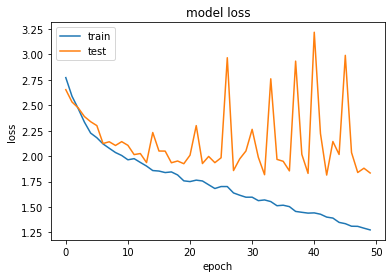

In [17]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# 50 epoch
# accuracy = .3972 mfcc
# accuracy = 0.2139 chroma
# accuracy = 0.0639 mfcc + chroma

In [ ]:
# def extract_feature(file_name, mfcc, chroma, mel):
#     with soundfile.SoundFile(file_name) as sound_file:
#         X = sound_file.read(dtype="float32")
#         sample_rate=sound_file.samplerate
#         if chroma:
#             stft=np.abs(librosa.stft(X))
#         result=np.array([])
#         if mfcc:
#             mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#             result=np.hstack((result, mfccs))
#         if chroma:
#             chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, chroma))
#         if mel:
#             mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, mel))

In [12]:
# Extract the mean bands to its own feature columns
df = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist())],axis=1)
df=df.fillna(0)

In [ ]:
X = df_piczak.drop(['esc'],axis=1)
Y = df_piczak['esc']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
# ranfom forest on MFCC features
rfc_mfcc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2,n_jobs=-1, random_state=42)
rfc_mfcc.fit(X_train,Y_train)

## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score




In [ ]:
# Extract the mean bands to its own feature columns
df = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist())],axis=1)
df=df.fillna(0)

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=22
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

In [ ]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
#DataFlair - Calculate the accuracy of our model
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

In [ ]:
#preparing data
train_data = pd.DataFrame()
train_data['fname'] = train['fname']
test_data = pd.DataFrame()
test_data['fname'] = audio_test_files

train_data = train_data['fname'].apply(get_mfcc, path='../input/audio_train/')
print('done loading train mfcc')
test_data = test_data['fname'].apply(get_mfcc, path='../input/audio_test/')
print('done loading test mfcc')

train_data['label'] = train['label']
test_data['label'] = np.zeros((len(audio_test_files)))